## Feature Extraction 

In [64]:
import os
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib   import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline      import Pipeline

In [2]:
# set root directory
path_root = Path("C:/Users/giann/data-science-core")
os.chdir(path_root)
print(f'- Root directory = {os.getcwd()}')

- Root directory = C:\Users\giann\data-science-core


### Manual feature extraction 
**Example 1**: The quantity and revenue features tell you how many items of a particular product were sold in a store and what the total revenue was. For the purpose of your analysis it's more interesting to know the **average price** per product.

In [11]:
# import dataset
path_dataset = path_root / 'dataset/grocery_sales.csv'
sales_df  = pd.read_csv(path_dataset)
sales_df.head(3)

,storeID,product,quantity,revenue
0,A,Apples,1811,9300.6
1,A,Bananas,1003,3375.2
2,A,Oranges,1604,8528.5


In [12]:
# Calculate the price from the quantity sold and revenue
sales_df['price'] = sales_df['revenue'] / sales_df['quantity']

In [13]:
# Drop the quantity and revenue features
reduced_df = sales_df.drop(['revenue', 'quantity'], axis = 1)

In [15]:
reduced_df.head(3)

,storeID,product,price
0,A,Apples,5.135616
1,A,Bananas,3.365105
2,A,Oranges,5.317020


**Example 2:** ANSUR dataset, `height_df`, where a person's height was measured 3 times. Add a feature with the mean height to the dataset and then drop the 3 original features.

In [57]:
path_dataset = path_root / 'dataset/ANSUR_II_MALE.csv'
data     = pd.read_csv(path_dataset)
data.head(2)

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Arms,Regular Army,Male,266,1467,337,222,1347,253,202,...,240,440,1054,175,853,81.5,1.776,25.838761,Overweight,Tall
1,Combat Support,Regular Army,Male,233,1395,326,220,1293,245,193,...,225,371,1054,167,815,72.6,1.702,25.062103,Overweight,Normal


In [ ]:
# Calculate the mean height
height_df['height'] = height_df[['height_1', 'height_2', 'height_3']].mean(axis=1)
# Drop the 3 original height features
reduced_df = height_df.drop(['height_1', 'height_2', 'height_3'], axis=1)
reduced_df.head()

Both cases we performed **feature extraction** and we still have a meaning about the features.

### Automatic feature extraction: PCA 

**Calculating Principal Components**: 
- **PCA** can be only calculated to **numerical features**. 
- **Categorical features** can be used to check if they are aligned with the principal components.

In [59]:
ansur_df = data[['shouldercircumference', 'buttockheight', 'waistcircumference', 'stature_m']]  
ansur_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4082 entries, 0 to 4081
Data columns (total 4 columns):
shouldercircumference    4082 non-null int64
buttockheight            4082 non-null int64
waistcircumference       4082 non-null int64
stature_m                4082 non-null float64
dtypes: float64(1), int64(3)
memory usage: 159.5 KB


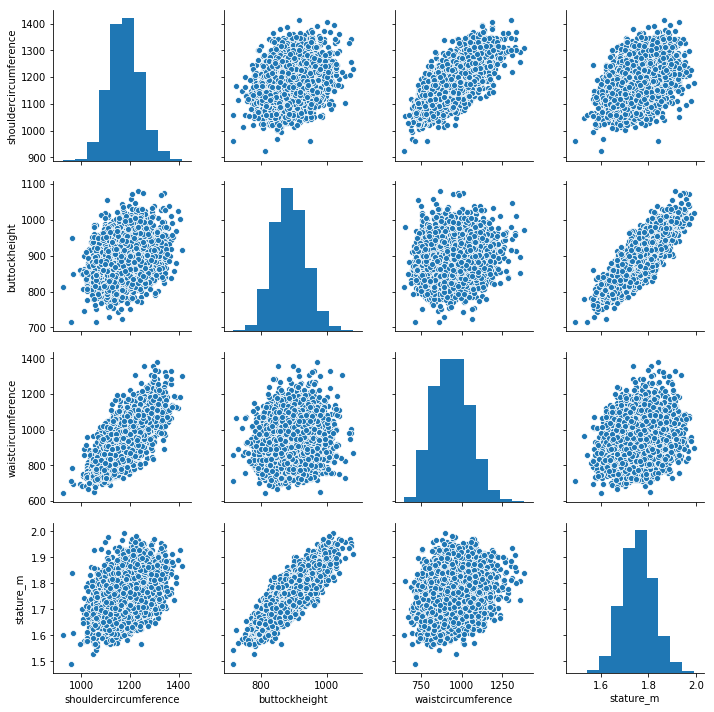

In [56]:
sns.pairplot(ansur_df)
plt.show()

In [30]:
# Create the scaler and standardize the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

C:\Users\giann\Anaconda3\envs\data-science\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\giann\Anaconda3\envs\data-science\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [31]:
# Create the PCA instance and fit and transform the data with pca
pca = PCA()
pc = pca.fit_transform(ansur_std)

In [33]:
# This changes the numpy array output back to a dataframe
pc_df = pd.DataFrame(pc, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4'])

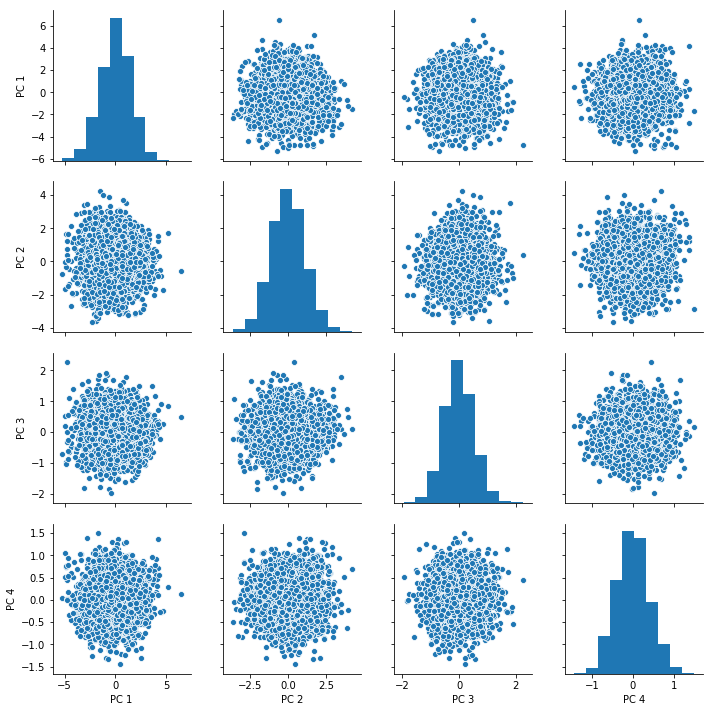

In [35]:
# Create a pairplot of the principal component dataframe
sns.pairplot(pc_df)
plt.show()

Notice how, in contrast to the input features, **none** of the principal components are correlated to one another.

**Inspect Principal Component**

In [49]:
print(pca.components_)

[[-0.51321031 -0.51064466 -0.4168086  -0.54966152]
 [-0.44489975  0.50142541 -0.61469028  0.41568333]
 [-0.73143933  0.11046269  0.66892114  0.07306849]
 [ 0.06062914  0.68964671  0.03116003 -0.72093036]]


In this case the principal component are equal to
- $PC_{1} = $ (-0.51) x  `shouldercircumference` + (-0.51) x  `buttockheight` + (-0.41)  x  `waistcircumference` + (-0.55)  x  `stature_m`
- $PC_{2} = $ (-0.44) x  `shouldercircumference` + ( 0.50)  x  `buttockheight` + (-0.61)  x  `waistcircumference` + ( 0.41)  x  `stature_m`
- $PC_{3} = $ ...

**Inspect the explained variance ratio per component**

In [36]:
print(pca.explained_variance_ratio_)

[0.57174616 0.31849579 0.06769    0.04206805]


In [38]:
# Print the cumulative sum of the explained variance ratio
print(pca.explained_variance_ratio_.cumsum())

[0.57174616 0.89024195 0.95793195 1.        ]


Using no more than 2 principal components we can explain roughly **90%** of the variance in the 4 feature dataset.

### PCA for EDA
Using `pipeline`

In [96]:
path_dataset = path_root / 'dataset/ANSUR_II_MALE.csv'
data     = pd.read_csv(path_dataset)

In [97]:
ansur_df = data[['shouldercircumference', 'buttockheight', 'waistcircumference', 'stature_m', 'Branch', 'Component', 'Gender', 'Height_class', 'BMI_class']]  
ansur_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4082 entries, 0 to 4081
Data columns (total 9 columns):
shouldercircumference    4082 non-null int64
buttockheight            4082 non-null int64
waistcircumference       4082 non-null int64
stature_m                4082 non-null float64
Branch                   4082 non-null object
Component                4082 non-null object
Gender                   4082 non-null object
Height_class             4082 non-null object
BMI_class                4082 non-null object
dtypes: float64(1), int64(3), object(5)
memory usage: 318.9+ KB


In [98]:
# define pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components = 4))
                ])

In [99]:
# fit and transform only numerical values
pc = pipe.fit_transform(ansur_df[['shouldercircumference', 'buttockheight', 'waistcircumference', 'stature_m']])
pc.shape

C:\Users\giann\Anaconda3\envs\data-science\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\giann\Anaconda3\envs\data-science\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(4082, 4)

In [104]:
vectors = pipe.steps[1][1].components_.round(2)
# Print feature effects
print('PC 1 effects = ' + str(dict(zip(ansur_df.columns, vectors[0]))))
print('PC 2 effects = ' + str(dict(zip(ansur_df.columns, vectors[1]))))

PC 1 effects = {'shouldercircumference': -0.51, 'buttockheight': -0.51, 'waistcircumference': -0.42, 'stature_m': -0.55}
PC 2 effects = {'shouldercircumference': -0.44, 'buttockheight': 0.5, 'waistcircumference': -0.61, 'stature_m': 0.42}


**PC1 Component Analysis**: 
- All features have a similar nagative effect. PC 1 can be interpreted as a measure of overall quality (low stats).

**PC2 Component Analysis**: 
- `buttockheight` and ` stature_m` have a strong positive effect on the second component
- `shouldercircumference` and `waistcircumference` have a strong negative effect. 
-  This component might quantifies an **X**  vs  **Y** characteristic trade-off.

#### Checking the effect of categorical features

In [101]:
# add pc component to existing dataframe
ansur_df.loc[:, 'PC 1'] = pc[:,0]
ansur_df.loc[:, 'PC 2'] = pc[:,1]

C:\Users\giann\Anaconda3\envs\data-science\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\giann\Anaconda3\envs\data-science\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


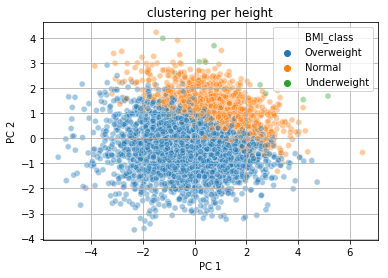

In [102]:
plt.title('clustering per height')
sns.scatterplot(data=ansur_df, x='PC 1', y='PC 2', hue='BMI_class', alpha=0.4)
plt.grid()
plt.show()

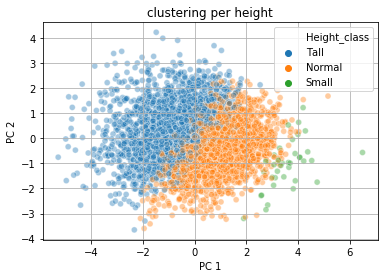

In [103]:
plt.title('clustering per height')
sns.scatterplot(data=ansur_df, x='PC 1', y='PC 2', hue='Height_class', alpha=0.4)
plt.grid()
plt.show()

In [108]:
### Choosing the number of components
path_dataset = path_root / 'dataset/ANSUR_II_MALE.csv'
data     = pd.read_csv(path_dataset)
data     = data.select_dtypes(exclude = 'object')

In [111]:
# Pipeline a scaler and pca selecting 10 components
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components = 10))])
# Fit the pipe to the data
pipe.fit(data)

C:\Users\giann\Anaconda3\envs\data-science\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\giann\Anaconda3\envs\data-science\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('reducer', PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

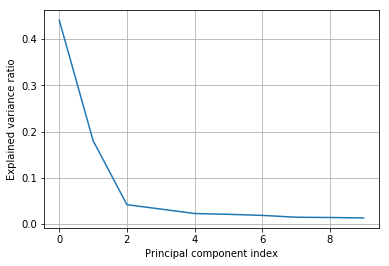

In [113]:
# Plot the explained variance ratio
plt.plot(pipe.steps[1][1].explained_variance_ratio_)
plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.grid()
plt.show()

3 Components can reduce the dataset without compromising too much on explained variance.